## Main figures

## Figure 7: Computation of the mean the seasonal cycle (MSC) and standard deviation (SDSC) by biotic units (bu)

### Estupinan-Suarez, et al. (2021). A Regional Earth System Data Lab for Understanding Ecosystem Dynamics: An Example from Tropical South America. Front. Earth Sci. 9:613395. doi: 10.3389/feart.2021.613395
#### Correspondence to: lestup@bgc-jena.mpg.de, linamaesu@gmail.com
#### GitHub repository: https://github.com/linamaes/Regional_ESDL

This script does the following:
- Load biotic unit map from NetCDF
- Use cubefittable for calculating mean and standard deviation of the seasonal cycle
- Compute the seasonality ratio between the annual and semiannual oscillation from the Fast Fourier power spectrum 
- Compute the fraction of annual and semiannual oscillation from the Fast Fourier power spectrum

About the notebook:
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

April 2021, Max Planck Insitute for Biogeochemistry, Jena, Germany

## Load packages

In [1]:
using ESDL

In [2]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4357800347309753429\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6111794832885056013\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4357800347309753429\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
using CSV

In [4]:
using Dates

In [5]:
using NPZ

In [6]:
using NetCDF

In [7]:
using Dates

In [8]:
using Plots

In [9]:
using Distributed

In [10]:
using OnlineStats

In [11]:
using WeightedOnlineStats

In [12]:
using FFTW

In [13]:
gr(size=(600,400))
default(fmt = :png)

### Loading data from PC1
- From PCA 1st component
- FFT PCA 1st component for comparison

In [14]:
cin = loadCube("pcacomstdTS1pc1km2014_mask")

ZArray Cube with the following dimensions
Time                Axis with 644 Elements from 2001-01-05T00:00:00 to 2014-12-31T00:00:00
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 27.81 GB


In [15]:
# Note: MSC dates are loss when saving the Cube
cmsc = loadCube("pcacom1msc1km2014_mask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from -29219.0 to -28859.0
Total size: 1.99 GB


In [16]:
# Note: SDSC dates are loss when saving the Cube
csdsc = loadCube("pcacom1sdsc1km2014_mask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from -29219.0 to -28859.0
Total size: 1.99 GB


In [17]:
# Note: MSC dates are loss when saving the Cube
cmscfft = loadCube("pcafftmsc1kmstd2014_mask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from -29219.0 to -28859.0
Total size: 1.99 GB


In [18]:
# Note: SDSC dates are loss when saving the Cube
csdscfft = loadCube("pcafftsdsc1kmstd2014_mask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from -29219.0 to -28859.0
Total size: 1.99 GB


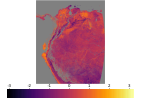

In [19]:
plotMAP(cmscfft, MSC=-29219.0)

## Loading Biotic Units map from NetCDF

In [20]:
pathin = "/my_path/.../"

"/my_path/.../"

In [70]:
path = string(pathin,"ESDLreg/netdcf/UB_IAvH_wgs84.nc");

In [23]:
layer = ncread(path, "layer");

In [24]:
cbu = CubeMem(CubeAxis[getAxis("Lon", cmsc),getAxis("Lat", cmsc)], layer)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


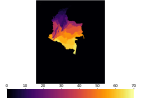

In [25]:
plotMAP(cbu, dmin=0, dmax=70)

## Subset

In [26]:
lat = (4,6)
lon = (-73,-71)
t1 = (2001:2005)

2001:2005

In [27]:
csub = cin[lat = lat, lon = lon]
busub = cbu[lat = lat, lon = lon]

In-Memory data cube with the following dimensions
Lon                 Axis with 240 Elements from -72.99626135 to -71.00460265
Lat                 Axis with 240 Elements from 5.99616935 to 4.004510649999999
Total size: 281.25 KB


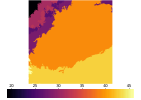

In [28]:
plotMAP(busub)

### Calculate MSC by biotic units to the subset

In [29]:
cmsc

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from -29219.0 to -28859.0
Total size: 1.99 GB


In [30]:
cbu

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


In [31]:
cmscsub = getMSC(csub)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In-Memory data cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00
Lon                 Axis with 240 Elements from -72.99626135 to -71.00460265
Lat                 Axis with 240 Elements from 5.99616935 to 4.004510649999999
Total size: 12.63 MB


## Assign MSC dates to loaded MSC cubes 

In [32]:
MSCdates = cmscsub.axes[1]

MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00

In [33]:
indims = InDims("MSC")
outdims = OutDims(MSCdates)

OutDims((ESDL.Cubes.Axes.ByValue(MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00),), (), zero, identity, :auto, false, AsArray(), :input, Zarr.NoCompressor(), "", false, 1)

In [34]:
function mscTime(xout,xin)
    xout[:] = xin
end

mscTime (generic function with 1 method)

In [35]:
cmscyr = mapCube(mscTime, cmsc, indims=indims, outdims=outdims)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:23


ZArray Cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 1.99 GB


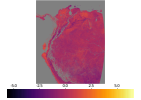

In [36]:
plotMAP(cmscyr, MSC=Date(1900,1,1))

## Caltulate zonal statistics

### MSC by biotic units

In [37]:
tab = CubeTable(veg=cmscyr, biome=cbu, include_axes=("lat","MSC"))
meanbybiome = cubefittable(tab,WeightedMean,:veg,by=(:biome, i->(i.MSC)), weight=i->cosd(i.lat))

Progress: 100%|█████████████████████████████████████████| Time: 0:01:55


In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: 1900-01-01T00:00:00 1900-01-09T00:00:00 .. 1900-12-19T00:00:00 1900-12-27T00:00:00 
Total size: 27.49 KB


In [38]:
tab = CubeTable(veg=cmscfft, biome=cbu, include_axes=("lat","MSC"))
meanbybiomefft = cubefittable(tab,WeightedMean,:veg,by=(:biome, i->(i.MSC)), weight=i->cosd(i.lat))

Progress: 100%|█████████████████████████████████████████| Time: 0:01:41


In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: -29219.0 -29211.0 .. -28867.0 -28859.0 
Total size: 27.49 KB


In [39]:
tax = collect(cmscyr.axes[1].values);

In [40]:
meanbybiome.properties["labels"]=include("bioticunits_name.jl");

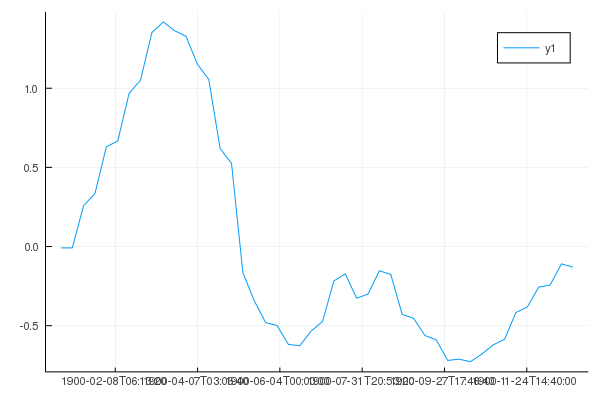

In [41]:
plot(tax, meanbybiome[3,:])

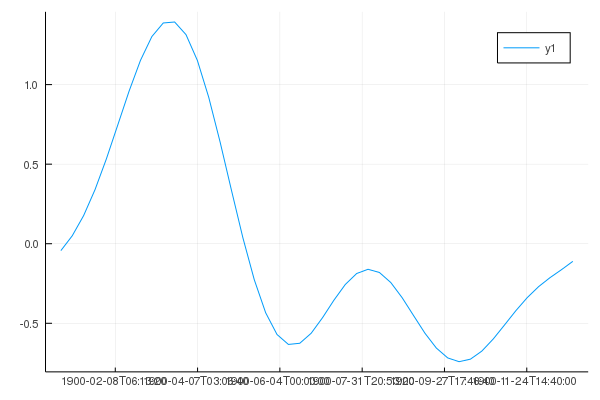

In [42]:
plot(tax, meanbybiomefft[3,:])

### Standard deviation by biotic units

In [43]:
tab = CubeTable(veg=cmscyr, biome=cbu, include_axes=("lat","MSC"))
varbybiome = cubefittable(tab, WeightedVariance, :veg, by=(:biome, i->(i.MSC)), weight=i->cosd(i.lat))

Progress: 100%|█████████████████████████████████████████| Time: 0:01:57


In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: 1900-01-01T00:00:00 1900-01-09T00:00:00 .. 1900-12-19T00:00:00 1900-12-27T00:00:00 
Total size: 27.49 KB


In [44]:
sdbybiome = map(x -> sqrt(x), varbybiome)

Transformed cube In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: 1900-01-01T00:00:00 1900-01-09T00:00:00 .. 1900-12-19T00:00:00 1900-12-27T00:00:00 
Total size: 27.49 KB


In [45]:
tab = CubeTable(veg=cmscfft, biome=cbu, include_axes=("lat","MSC"))
varbybiomefft = cubefittable(tab, WeightedVariance, :veg, by=(:biome, i->(i.MSC)), weight=i->cosd(i.lat))

Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: -29219.0 -29211.0 .. -28867.0 -28859.0 
Total size: 27.49 KB


In [46]:
sdbybiomefft = map(x -> sqrt(x), varbybiomefft)

Transformed cube In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Category2           Axis with 46 elements: -29219.0 -29211.0 .. -28867.0 -28859.0 
Total size: 27.49 KB


In [47]:
sdbybiome.properties["labels"]=include("bioticunits_name.jl");

## Calculate ratio between annual and semiannual oscilattion

In [48]:
### This function computes the ratio between the 2nd & (3rd+4yh) components
function spratioFx(xin)
    any(ismissing, xin) && return missing
    xfft = fft(convert(Vector{Float64}, xin))
    xout = abs(xfft[2])/(abs(xfft[3])+abs(xfft[4]))
end

spratioFx (generic function with 1 method)

In [49]:
ratiosp = mapslices(spratioFx, meanbybiome, dims="Category2")

In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Total size: 612.0 bytes


In [50]:
# Rows are the biotic units sort by ratiosp's cube axis, and columnts are the MSC dates
meanbybiome[:,:]

68×46 Array{Union{Missing, Float64},2}:
 -0.152995    -0.151033    -0.138959     …  -0.225538   -0.258154  
 -0.740473    -0.635721    -0.21911         -1.10059    -1.08673   
 -0.00876539  -0.00875243   0.257981        -0.109729   -0.130013  
  0.591941     0.660453     1.19692          0.174867    0.196683  
  0.267749     0.363781     0.962203        -0.175079   -0.17748   
  0.180575     0.251923     0.8375       …  -0.241221   -0.236487  
  0.543976     0.533039     0.652132         0.455877    0.429132  
  0.401546     0.458933     0.94343         -0.0222134  -0.00139871
  0.534434     0.577196     0.900706         0.370735    0.312441  
  0.860478     1.00688      1.71848          0.24239     0.254024  
  0.290684     0.36612      0.604062     …   0.298214    0.116426  
  0.29279      0.379183     1.03008         -0.0796054  -0.111039  
  0.342526     0.397992     0.899051         0.132766    0.027169  
  ⋮                                      ⋱               ⋮         
 -0.1357

### Calculate fraction of Annual and Semuiannual Oscillation

In [51]:
function perAnnSemFx(xin)
    any(ismissing, xin) && return missing
    xfft = fft(convert(Vector{Float64}, xin))
    absx = map(x->abs(x), xfft)
    #xout = (abs(xfft[2])+abs(xfft[3])+abs(xfft[4]))/sum(absx[2:23])
    xout = sum(absx[2:4])/sum(absx[2:23])
    return xout
end

perAnnSemFx (generic function with 1 method)

In [52]:
percannsem = mapslices(perAnnSemFx, meanbybiome, dims="Category2")

In-Memory data cube with the following dimensions
Label1              Axis with 68 elements: -3.4e38 1.0 .. 66.0 67.0 
Total size: 612.0 bytes


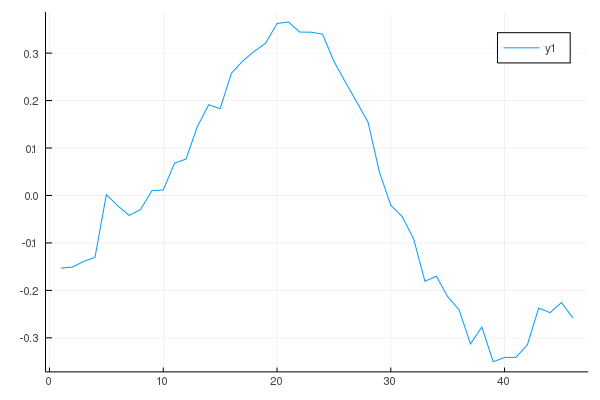

In [53]:
plot(meanbybiome[1,:])

In [54]:
# Concatenate data
df1 = hcat(meanbybiome.axes[1].values, ratiosp[:], percannsem[:], meanbybiome[:,:]);

## SaveCubes

In [62]:
# saveCube(meanbybiome, "biomepcamsc1km2014_mask")

In [63]:
# saveCube(meanbybiomefft, "biomepcamscfft1km2014_mask")

In [64]:
# saveCube(sdbybiome, "biomepcasdsc1km2014_mask")

In [65]:
# saveCube(sdbybiomefft, "biomepcasdscfft1km2014_mask")

In [66]:
# saveCube(ratiosp, "ratio_biome_pca1km2014_mask")

In [67]:
# saveCube(percannsem, "fraction_biome_pca1km2014_mask")

## Note: There is a follow-up script for plotting
